# Final Analysis of Vaccination Rates
Vaccination rates have begun to fall in areas of Califonia. This has led to outbreaks of previously erradicated diseases. This isn't just a problem in California so it would be helpful to identify demographic indicators that could help us target where outbreaks are more likely to occur, allowing targeted educaitonal campaigns to combat misinformation about vaccinations.
## Exploration Questions
What does the vaccination rate look like accross California?

What relationship (if any) do the folowing variables have on the vaccination rates?accross countries.
- Income
- Unemployment
- County Education Level
- Insured Rate
- County Population

## Data being used
- Kindergarten Immunization records from Kaggle [link](https://www.kaggle.com/broach/california-kindergarten-immunization-rates)
- CA census estimates currated by the state [link](http://www.dof.ca.gov/Reports/Demographic_Reports/American_Community_Survey/#ACS2017x5)

# Imports

## Modules and Environment

In [2]:
# Calculation
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Additional Modules
import subprocess
from functools import reduce

get_ipython().run_line_magic('config', 'IPCompleter.greedy = True')

## Data from exploration and cleanup

In [3]:
from helper_funcs import merged_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 1 to 1567
Data columns (total 7 columns):
County                    58 non-null object
High School Graduate      58 non-null object
Bachelors                 58 non-null object
Graduate Degree           58 non-null object
High School or Higher     58 non-null object
Bachelors or Higher       58 non-null object
No High School Diploma    58 non-null object
dtypes: object(7)
memory usage: 3.6+ KB


In [4]:
merged_df.head()

,County,n,exemptions,Percent Vaccinated,High School Graduate,Bachelors,Graduate Degree,High School or Higher,Bachelors or Higher,No High School Diploma,Population,Percent Insured,Median Income,Mean Income,Per capita income,Mean - Median,Unemployment Percentage
28,Nevada,3998,805,79.86,20.8,21.4,11.4,94.3,32.8,5.7,97694,85.5,56949,75742,32117,18793,6.0
52,Trinity,473,70,85.20,27.7,16.8,5.2,90.7,22.0,9.4,13304,79.4,36862,52729,23145,15867,6.1
54,Tuolumne,2331,265,88.63,28.7,13.5,6.3,89.6,19.8,10.4,50986,87.8,48493,62446,26063,13953,7.5
11,Humboldt,7511,789,89.50,25.9,18.5,9.0,90.3,27.5,9.6,133758,81.2,42153,56409,23516,14256,6.7
46,Siskiyou,2211,211,90.46,26.0,16.2,7.8,88.8,24.0,11.2,44035,85.8,37495,50453,22482,12958,7.5


# Visualizations and Analysis

,Percent Vaccinated
count,58.000000
mean,95.283966
std,3.772534
min,79.860000
25%,92.812500
50%,96.305000
75%,98.122500
max,99.560000


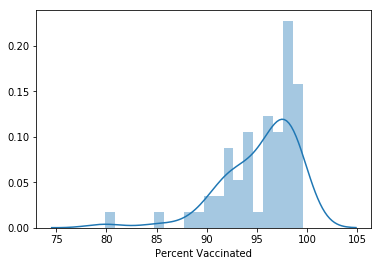

In [15]:
# Some Descriptive data and Probabability density function, looking for outliers
num_of_bins = 20
display(pd.DataFrame(merged_df['Percent Vaccinated'].describe()))
ax = sns.distplot(merged_df['Percent Vaccinated'], bins=num_of_bins)
fig = ax.get_figure()
fig.savefig('output/vaccination_distplot.png', dpi=300)

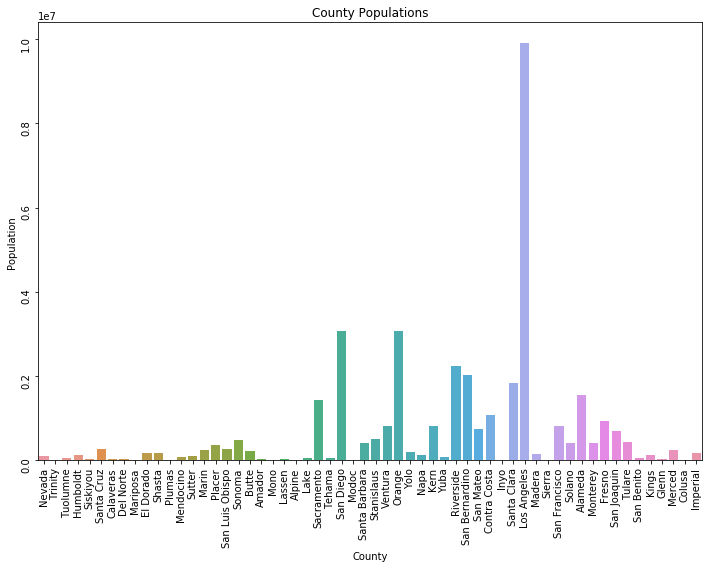

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='County', y='Population', data=merged_df, ax=ax)
ax.tick_params(rotation=90)
ax.set_title('County Populations')
fig.tight_layout()
fig.savefig('output/population_bar.png', dpi=300)

## Education level potentially has a correlation

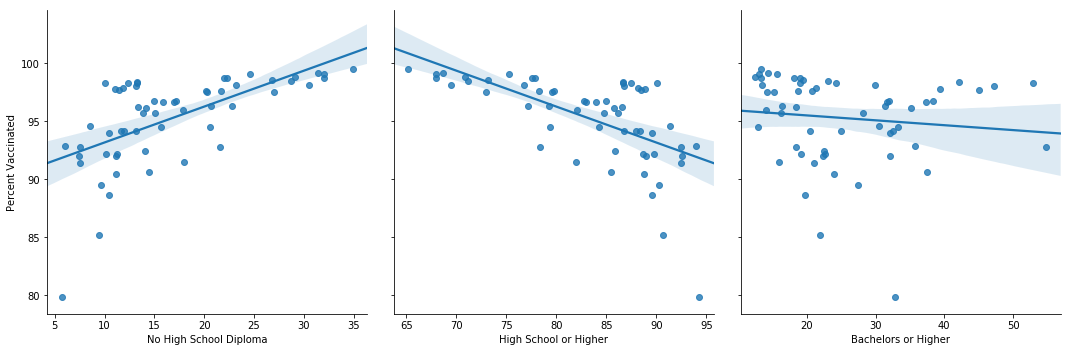

In [17]:
education_cols = ['No High School Diploma', 'High School or Higher',
                 'Bachelors or Higher']
sns_plot = sns.pairplot(merged_df, y_vars='Percent Vaccinated', x_vars=education_cols,
                 kind='reg', height=5)
sns_plot.savefig('output/education_bubble.png', dpi=300)

## Linear regression on no High School Diploma
There is a significantly small p-value indicating a correlation. The r-squared value of 0.38 implies reasonable predictive value.

The coeficient of our linear Regression is: 0.31 with a constant of: 90.09 and an R-squared value of: 0.38 and a p-value of: 3.241828654453735e-07.


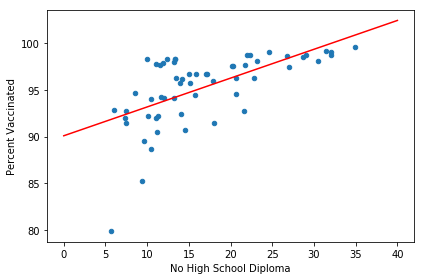

In [26]:
# Look at linear regression for the High Schol or Higher group
X = merged_df['No High School Diploma']
Y = merged_df['Percent Vaccinated']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predication = model.predict(X)

# print_model = model.summary()
# print(print_model)

const, coef = model.params
p_val = model.pvalues['No High School Diploma']
print(f'The coeficient of our linear Regression is: {round(coef,2)} with a constant of: {round(const,2)}\
 and an R-squared value of: {round(model.rsquared, 2)} and a p-value of: {p_val}.')

# Plot the data with the regression line
fig, ax = plt.subplots()

# Bubble Plot
merged_df.plot.scatter(x='No High School Diploma', y='Percent Vaccinated', ax=ax)

# Regression line
x = np.linspace(0, 40)
y = coef * x + const

plt.plot(x, y, '-r')

fig.tight_layout()
fig.savefig('output/lin_reg.png', dpi=300)

## Suprisingly Not Relevant
Here we see that income, unemployment, population, and percent insured seem to have no relevant correlation.

*Note that I ran a regression on Percent Insured found that the p-value was high.

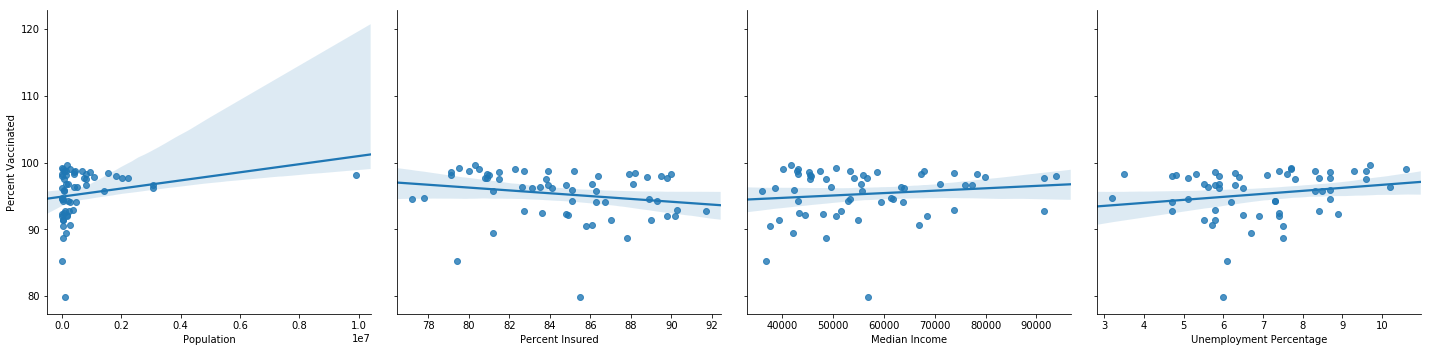

In [19]:
cols = ['Population', 'Percent Insured', 'Median Income', 'Unemployment Percentage']
sns_plot = sns.pairplot(merged_df, y_vars='Percent Vaccinated', x_vars=cols, kind='reg', height=5)
sns_plot.savefig('output/not_relevant_scatter.png', dpi=300)

# Findings

## What does the vaccination rate look like around California?
- There is a relatively large range of vaccination rates accross California Counties. The difference from the lowest to highest county is about 20%
- The mean and median are in the 95-96% range. This is good for herd immunity, but the Std Dev of 3 means that there are a significant number of counties that are likely below the threshholds for herd immunity needed for contagious diseases like the measles.

## Education level
- There appears to be correlation between a counties percentage of residents with 'No High School Diploma' and the vaccination rate.
    - The high r-squared value implies that this isn't predictive. 
    - It could also be an artifact.
    - We're looking at a .38% increase in percent vacinated for every 1% increase in the percent of high school dropouts.
- Interestingly this correlation seems to dissapear at any other educational milestone.


## Other Demographic indicators
- None of the other indicators I looked at appear to correlate with the vaccination rate.

# Next Steps

## Disaggregate data by city
Noting the large variance in county size, it would be interesting to see if looking at the same data at the city level would lend any new insghts.

## Other demographic indicators
While dissagregating the data might yields some interesting insights, we might just be missing the relevant indicators. Some interesting data to include for further analysis might be:
- Number of members in households
- Ethnicity
- Religion